Hierarichal Clustering Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
iris_data = pd.DataFrame(iris.data)

In [4]:
iris_data.columns = iris.feature_names

In [6]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
## Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
X_scaled = scaler.fit_transform(iris_data)
X_scaled.shape

(150, 4)

Now we will do dimentionality reduction from 4-D to 2-D using PCA

In [10]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)
pca

PCA(n_components=2)

In [14]:
pca_scaled = pca.fit_transform(X_scaled)

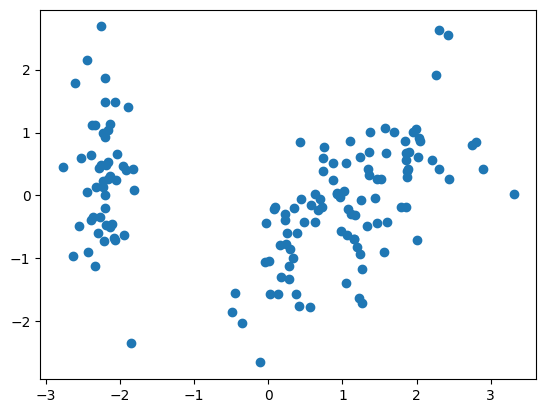

In [21]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1])

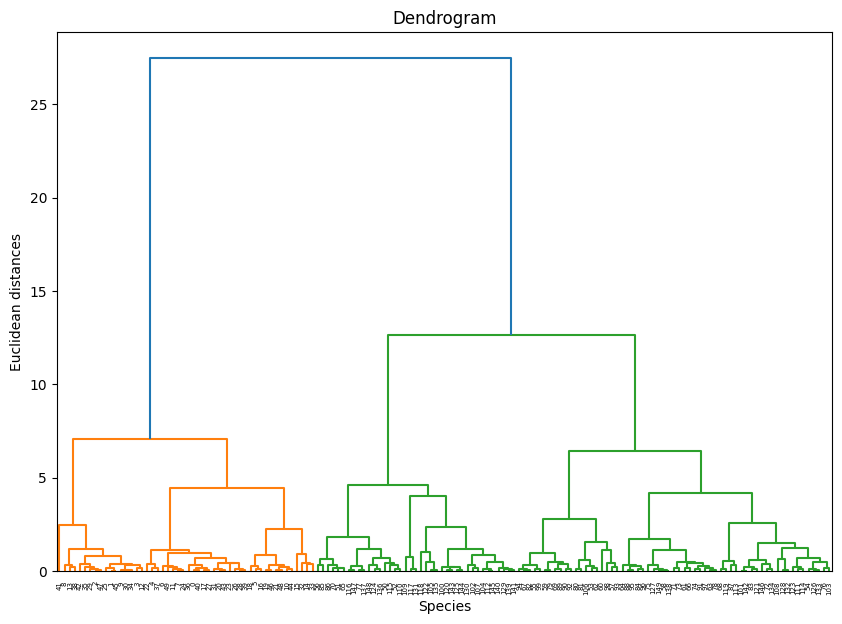

In [16]:
# Agglomerative Clustering
# To construct a dendrogram, we will use the linkage class from the hierarchy module. The linkage class has a method called linkage() which takes the dataset and the method to minimize distances as parameters. We will use the 'ward' method to minimize the variance of the clusters being merged.
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")

# Create dendrogram
sc.dendrogram(sc.linkage(pca_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Species')
plt.ylabel('Euclidean distances')
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit_predict(pca_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

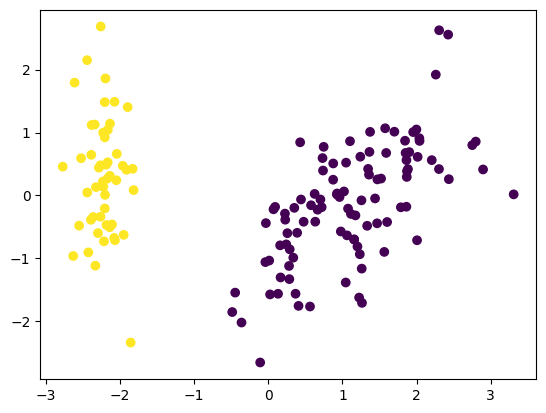

In [27]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1], c=cluster.labels_)

In [28]:
# Silhouette Score
from sklearn.metrics import silhouette_score

In [29]:
silhouette_coefficients = []
for k in range(2, 11):
    agg = AgglomerativeClustering(n_clusters=k)
    agg.fit_predict(pca_scaled)
    score = silhouette_score(pca_scaled, agg.labels_)
    silhouette_coefficients.append(score)

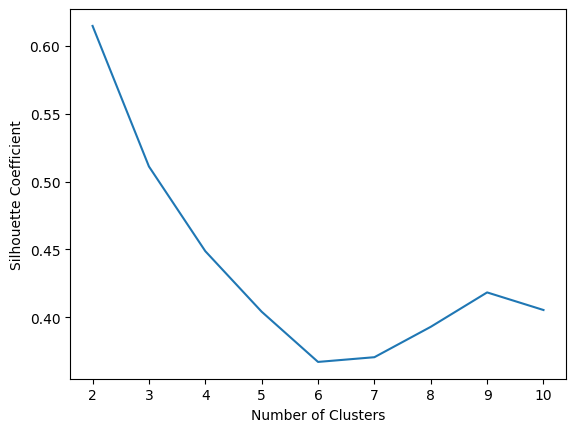

In [ ]:
# Plotting silhouette score
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()